In [53]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
cancer.keys()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
df1=load_breast_cancer(as_frame=True)
df1

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [4]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_data=scaler.fit_transform(df)

scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [6]:
from sklearn.preprocessing import StandardScaler

scaled_data1=StandardScaler().fit_transform(df)

scaled_data1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
scaled_data1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
#2 Eligibility Tests
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,chi2   
                          
p=calculate_bartlett_sphericity(scaled_data) 
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  <scipy.stats._continuous_distns.chi2_gen object at 0x7fdcd8cd06d0>
p value :  (39362.120841131604, 0.0)


In [20]:
#2 Eligibility Tests
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,chi2   
                          
p=calculate_bartlett_sphericity(scaled_data1) 
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  <scipy.stats._continuous_distns.chi2_gen object at 0x7fdcd8cd06d0>
p value :  (39362.120841131604, 0.0)


In [9]:
p=calculate_bartlett_sphericity(scaled_data) 
p

(39362.120841131604, 0.0)

In [10]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

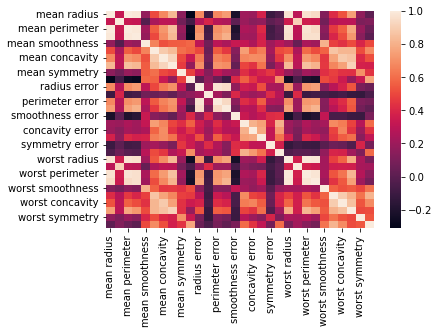

In [11]:
sns.heatmap(df.corr())

In [12]:
p=calculate_bartlett_sphericity(scaled_data) 
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  <scipy.stats._continuous_distns.chi2_gen object at 0x7fdcd8cd06d0>
p value :  (39362.120841131604, 0.0)


In [13]:
#kmo - proportion of variance of each and whole
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(scaled_data)
print(kmo_all,kmo_model)

[0.83463512 0.64352613 0.85334054 0.86403253 0.814716   0.87939755
 0.89192843 0.90027723 0.82510264 0.83181381 0.83412178 0.48458942
 0.84290718 0.85199881 0.64427854 0.8712978  0.82547994 0.83516673
 0.5832182  0.81149623 0.82308704 0.60329755 0.88493799 0.82044529
 0.75316064 0.85127714 0.90222587 0.89105242 0.69074764 0.81233969] 0.8322253094685806


/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [14]:
#computing eigen value and scree plot

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=scaled_data.shape[1])

fa.fit(scaled_data)

ev,_ = fa.get_eigenvalues()
print(ev)


[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 3.11594025e-02
 2.99728939e-02 2.74394025e-02 2.43408378e-02 1.80550070e-02
 1.54812714e-02 8.17763986e-03 6.90046388e-03 1.58933787e-03
 7.48803097e-04 1.33044823e-04]


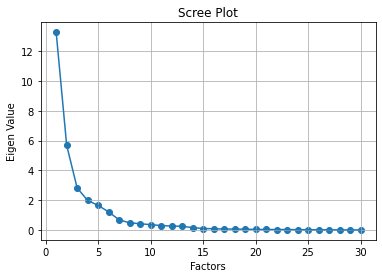

In [15]:
plt.scatter(range(1,scaled_data.shape[1]+1),ev)
plt.plot(range(1,scaled_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [16]:
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=4)

pca.fit(scaled_data)

x_pca=pca.transform(scaled_data)



In [22]:
scaled_data.shape

(569, 30)

In [23]:
x_pca.shape

(569, 4)

Text(0, 0.5, 'Second Principal Component')

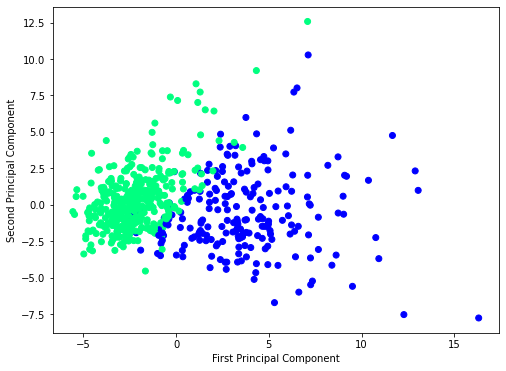

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='winter')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


In [28]:
plt.figure(figsize=(8,6))
df['pca1'] = x_pca[:,0]
df['pca2'] = x_pca[:,1]
df['pca3'] = x_pca[:,2]
df['pca3'] = x_pca[:,3]
sns.scatterplot(x = "pca1",y = 'pca2',cmap='winter',hue='y')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

ValueError: Could not interpret value `pca1` for parameter `x`

<Figure size 576x432 with 0 Axes>

In [29]:
plt.figure(figsize=(8,6))
df['pca1'] = x_pca[:,0]
df['pca2'] = x_pca[:,1]
df['pca3'] = x_pca[:,2]
df['pca3'] = x_pca[:,3]

<Figure size 576x432 with 0 Axes>

Text(0, 0.5, 'Second Principal Component')

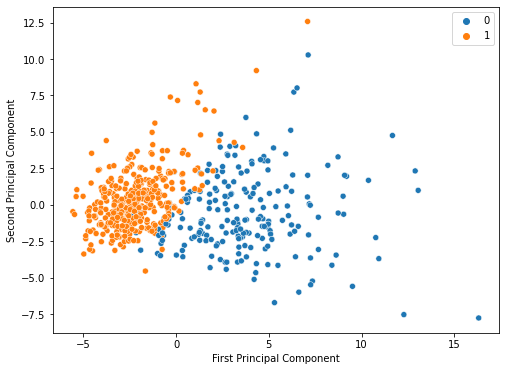

In [39]:
plt.figure(figsize=(8,6))
df['pca1'] = x_pca[:,0]
df['pca2'] = x_pca[:,1]
df['pca3'] = x_pca[:,2]
df['pca3'] = x_pca[:,3]
sns.scatterplot(x = "pca1",y = 'pca2',cmap='winter',hue = cancer['target'],data=df)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [40]:
from mpl_toolkits.mplot3d import Axes3D


/var/folders/kg/xq7xr8t15l555m9hcznhw4140000gq/T/ipykernel_12607/1699721501.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


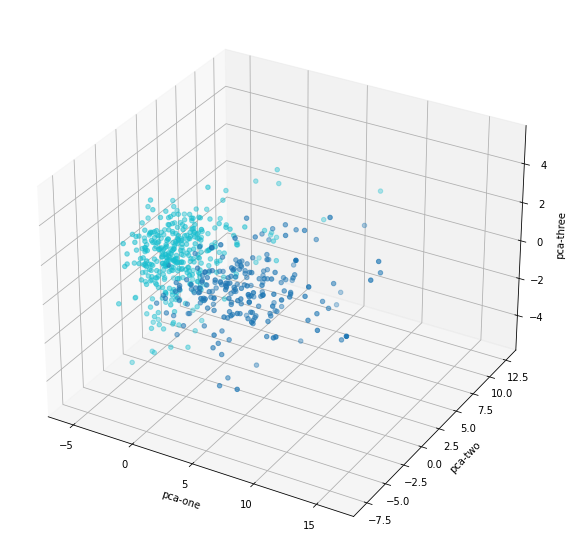

In [50]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.pca1, 
    ys=df.pca2, 
    zs=df.pca3, 
    c=cancer.target, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [54]:
ev

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

In [55]:
#Rotation Method

fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

#Above command is for factor loadings

#Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

  


                                0         1         2         3         4  \
mean radius              0.960493  0.025478 -0.027910  0.067277 -0.159011   
mean texture             0.286649  0.066342 -0.010110  0.868258  0.086627   
mean perimeter           0.961966  0.066936  0.002625  0.068701 -0.150139   
mean area                0.974519  0.023688 -0.021335  0.053944 -0.082332   
mean smoothness          0.216599  0.188445  0.802184 -0.126797  0.211275   
mean compactness         0.502464  0.592338  0.478237  0.054668 -0.031015   
mean concavity           0.685017  0.571092  0.296516  0.084520 -0.021250   
mean concave points      0.829270  0.319597  0.333346  0.043048 -0.017261   
mean symmetry            0.179590  0.288770  0.361244 -0.032006  0.188031   
mean fractal dimension  -0.273018  0.599245  0.555066 -0.063664  0.196103   
radius error             0.819235  0.145300  0.031359 -0.013508  0.435717   
texture error           -0.055075  0.160600 -0.072550  0.453200  0.617831   

In [56]:

#VARIANCE
#The amount of variance explained by each factor can be found out using the ‘get_factor_variance’ function
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))
                        
#Variance Explained by Factors (Image by Author)

#The first row represents the variance explained by each factor. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 6 factors together are able to explain 85.5% of the total variance.
#In unrotated cases, the variances would be equal to the eigenvalues. Rotation changes the distribution of proportional variance but the cumulative variance will remain the same. Oblique rotations allow correlation between the factors while the orthogonal rotations keep the factors uncorrelated.
 #COMMUNALITIES
#Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.

print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))
        
#Communalities 

#The proportion of each variable’s variance that is explained by the factors can be inferred from the above. For example, we could consider the variable ‘radius error’ about 88.4% of its variance is explained by all the factors together.

                          0         1         2         3         4         5
Variance          11.545966  5.963039  3.686035  3.097642  2.409362  2.032909
Proportional Var   0.349878  0.180698  0.111698  0.093868  0.073011  0.061603
Cumulative Var     0.349878  0.530576  0.642274  0.736142  0.809153  0.870756
                         Communalities
mean radius                   0.953916
mean texture                  0.848071
mean perimeter                0.957889
mean area                     0.960400
mean smoothness               0.815091
mean compactness              0.904498
mean concavity                0.917685
mean concave points           0.922899
mean symmetry                 0.647692
mean fractal dimension        0.820118
radius error                  0.885090
texture error                 0.621195
perimeter error               0.870917
area error                    0.843047
smoothness error              0.555698
compactness error             0.891270
concavity error          